## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

#### 교과목명: 딥러닝알고리즘 구현
- 평가일: 2022.11. 18
- 성명:
- 점수:

Q1. 사람이 문장을 읽는 것처럼 이전에 나온 것을 기억하면서 단어별로 또는 한눈에 들어오는 만큼씩 처리하여 문장에 있은 의미를 자연스럽게 표현하려는 목적으로 과거 정보를 사용하고 새롭게 얻은 정보를 계속 업데이트하는 방식이 순환 신경망(RNN) 이다. SimpleRNN을 활용하여 IMDB 영화 리뷰 데이터에 대하여 아래 사항을 수행하세요.
- 데이터 전처리 : max_features 10000, maxlen = 500, batch_size 32
- 케라스를 사용하여 입력 시퀀스에 대한 마지막 출력만 반환하는 방식으로 모델링.(embedding 층 입력 (max_features, 32))
- 학습 및 검증 옵션 : epochs 10, batch_size 128, 검증 데이터 20%
- 훈련과 검증의 손실과 정확도를 그래프로 표현
- 검증 정확도를 확인하고 동 사례에 SimpleRNN 모델의 적합 여부 및 개선 방안에 대하여 기술하세요.

In [ ]:
# IMDB 데이터 셋 : 양극단의 리뷰 50000개로 구성
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500  # 사용할 텍스트의 길이
batch_size = 32

(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')


25000 훈련 시퀀스
25000 테스트 시퀀스


In [ ]:
print('시퀀스 패딩(samples x time')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:',input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩(samples x time
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [ ]:
# 13분
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss= 'binary_crossentropy', metrics=['acc'])
history = model.fit(input_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 79s 483ms/step - loss: 0.6658 - acc: 0.5914 - val_loss: 0.5396 - val_acc: 0.7714
Epoch 2/10
157/157 [==============================] - 84s 536ms/step - loss: 0.4282 - acc: 0.8159 - val_loss: 0.5866 - val_acc: 0.6730
Epoch 3/10
157/157 [==============================] - 83s 528ms/step - loss: 0.3018 - acc: 0.8806 - val_loss: 0.4041 - val_acc: 0.8270
Epoch 4/10
157/157 [==============================] - 72s 457ms/step - loss: 0.2334 - acc: 0.9101 - val_loss: 0.3910 - val_acc: 0.8422
Epoch 5/10
157/157 [==============================] - 71s 451ms/step - loss: 0.1611 - acc: 0.9422 - val_loss: 0.4131 - val_acc: 0.8430
Epoch 6/10
157/157 [==============================] - 70s 443ms/step - loss: 0.1059 - acc: 0.9650 - val_loss: 0.5313 - val_acc: 0.7930
Epoch 7/10
157/157 [==============================] - 70s 449ms/step - loss: 0.0604 - acc: 0.9821 - val_loss: 0.5346 - val_acc: 0.8156
Epoch 8/10
157/157 [==============================] - 6

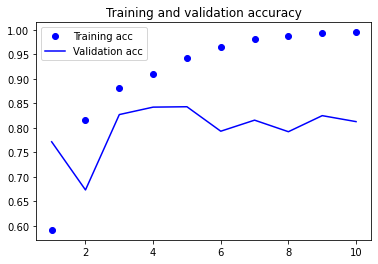

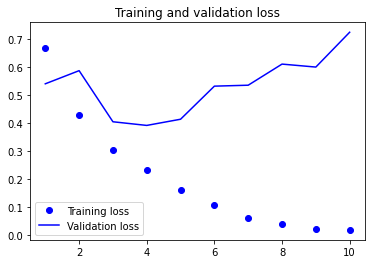

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 전체 시퀀스를 500 이상으로 재조정
- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음 - 그래디언트 소실 문제
- LSTM 등 고려

Q2. Q1 문제를 LSTM 모델을 적용하여 수행하세요
- 모델링, 학습 및 검증
- 결과 시각화

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train,y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 7s 25ms/step - loss: 0.5314 - acc: 0.7490 - val_loss: 0.4565 - val_acc: 0.8144
Epoch 2/10
157/157 [==============================] - 3s 22ms/step - loss: 0.3055 - acc: 0.8784 - val_loss: 0.4881 - val_acc: 0.8066
Epoch 3/10
157/157 [==============================] - 3s 22ms/step - loss: 0.2369 - acc: 0.9123 - val_loss: 0.4268 - val_acc: 0.8358
Epoch 4/10
157/157 [==============================] - 3s 22ms/step - loss: 0.2018 - acc: 0.9247 - val_loss: 0.3159 - val_acc: 0.8634
Epoch 5/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1782 - acc: 0.9345 - val_loss: 0.2946 - val_acc: 0.8906
Epoch 6/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1598 - acc: 0.9423 - val_loss: 0.3656 - val_acc: 0.8484
Epoch 7/10
157/157 [==============================] - 3s 22ms/step - loss: 0.1410 - acc: 0.9513 - val_loss: 0.3305 - val_acc: 0.8874
Epoch 8/10
157/157 [==============================] - 3s 22ms/step - 

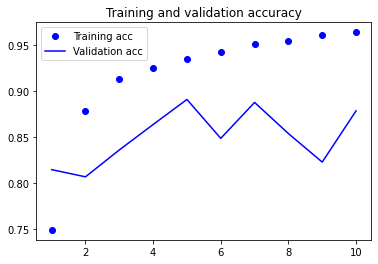

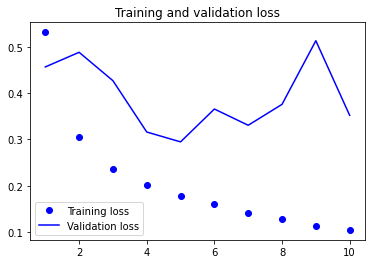

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Q3. MNIST 숫자 이미지 데이터에 대하여 CNN 모델을 사용하여 아래사항을 수행하세요
- Conv2D와 MaxPooling2D 층을 사용하여 컨브넷을 생성(채널의 수 32개 또는 64개)
- 출력 텐서를 완전 연결 네트워크에 주입
- 10개의 클래스 분류하기 위한 분류기 추가
- 컨브넷 학습 및 평가

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1))) # 3x3 크기의 필터 32개 
model.add(layers.MaxPooling2D((2,2))) # 풀링은 세로 가로방향의 공간을 줄이는 연산
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

Cov2D와 MaxPooling2D층의 출력은 (height, width, channels) 크기의 3D 텐서이다. 다음 단계는 마지막 층의 (3,3,64) 크기인 출력 텐서를 완전 연결 네트워크에 주입하는 것이다. 이 네트워크는 Dense 층을 쌓은 분류기이며 이 분류기는 1D 벡터를 처리하므로 3D 출력을 1D 텐서로 펼쳐야 한다.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32')/255 # 0과 1 사이의 값을 가지는 float 타입으로 변환

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.1704 - accuracy: 0.9463
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0326 - accuracy: 0.9897
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0192 - accuracy: 0.9939


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0249 - accuracy: 0.9925


0.9925000071525574

Q4. cats_and_dogs_small으로 축소한 데이터 셋으로 사전 훈련된 네트워크를 사용하여 강아지 고양이 분류 과제를 아래와 같이 수행하세요.
- ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반 층을 사용하여 유용한 특성 추출하고 이 특성으로 분류기 훈련
- VGG 매개변수
 - weights는 모델을 초기화할 가중치 체크포인트를 지정 : 'imagenet'
 - include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정 : False
 - input_shape은 네트워크에 주입할 이미지 텐서의 크기 :(150,150,3)
- 데이터 증식을 사용하지 않는 방법으로 수행
- 완전 연결 분류기를 정의하고 규제를 위해 드롭아웃 사용 : 0.5

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', # imagenet으로 학습한 가중치
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# 시간소요 20분 이상
# 새로운 데이터에서 합성곱 기반 층을 실행하고 출력을 넘파이 배열로 디스크에 저장한 다음
# 독립된 완전 연결 분류기에 입력으로 사용
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'drive/MyDrive/colab_lecture/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) # conv_base에 데이터를 주입하고 출력을 기록
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 1s 5ms/step - loss: 0.5828 - acc: 0.6680 - val_loss: 0.4497 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.4249 - acc: 0.8140 - val_loss: 0.3718 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3610 - acc: 0.8455 - val_loss: 0.3317 - val_acc: 0.8680
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3142 - acc: 0.8680 - val_loss: 0.3192 - val_acc: 0.8640
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2854 - acc: 0.8835 - val_loss: 0.2947 - val_acc: 0.8860
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2651 - acc: 0.8975 - val_loss: 0.2871 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2473 - acc: 0.8995 - val_loss: 0.2708 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2279 - acc:

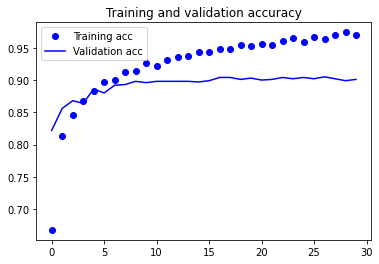

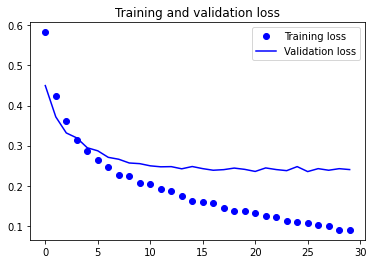

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Q5. Q4 문제를 데이터 증식을 사용한 방식으로 수행하세요.

In [ ]:
# 준비한 모델(conv_base) 위에 Dense 층을 쌓아 확장합니다. 그다음 입력 데이터에서 엔드 투 엔드로 전체 모델을 실행
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 30
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [ ]:
# 11분
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 - 23s - loss: 0.5426 - acc: 0.7490 - val_loss: 0.4279 - val_acc: 0.8280 - 23s/epoch - 231ms/step
Epoch 2/30
100/100 - 22s - loss: 0.4018 - acc: 0.8380 - val_loss: 0.3352 - val_acc: 0.8830 - 22s/epoch - 221ms/step
Epoch 3/30
100/100 - 22s - loss: 0.3526 - acc: 0.8550 - val_loss: 0.3113 - val_acc: 0.8820 - 22s/epoch - 220ms/step
Epoch 4/30
100/100 - 22s - loss: 0.3188 - acc: 0.8715 - val_loss: 0.2872 - val_acc: 0.8900 - 22s/epoch - 222ms/step
Epoch 5/30
100/100 - 22s - loss: 0.3054 - acc: 0.8725 - val_loss: 0.2710 - val_acc: 0.8960 - 22s/epoch - 220ms/step
Epoch 6/30
100/100 - 22s - loss: 0.2960 - acc: 0.8785 - val_loss: 0.2676 - val_acc: 0.8960 - 22s/epoch - 217ms/step
Epoch 7/30
100/100 - 23s - loss: 0.2756 - acc: 0.8885 - val_loss: 0.2631 - val_acc: 0.8930 - 23s/epoch - 228ms/step
Epoch 8/30
100/100 - 22s - loss: 0.2588 - acc: 0.9000 - val_loss: 0.2535 - val_acc: 0.8980 - 22s/epoch - 219ms/step
Epoch 9/30
100/100 - 22s - loss: 0.2581 - acc: 0.8900 - val_loss: 0.2478

In [ ]:
model.save('drive/MyDrive/colab_lecture/cats_and_dogs_small_3.h5')

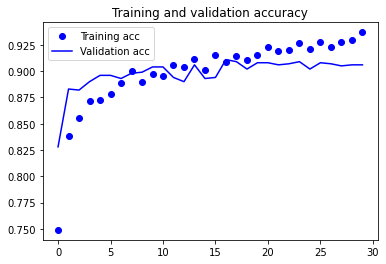

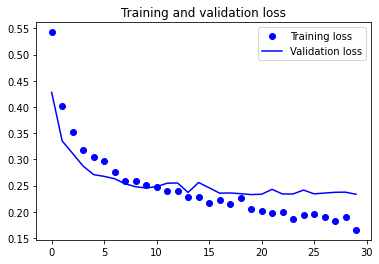

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()